In [ ]:
import csv
import pandas as pd
import numpy as np

ds = pd.read_csv("last_month.csv")
ds.head()

,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,2024-11-08T00:00:00.000Z,147.63,149.7700,146.26,148.77,175665830,147.63,149.7700,146.26,148.77,175665830,0.0,1.0
1,2024-11-07T00:00:00.000Z,148.88,148.9300,146.17,146.39,207323303,148.88,148.9300,146.17,146.39,207323303,0.0,1.0
2,2024-11-06T00:00:00.000Z,145.61,146.4900,141.96,142.96,242043945,145.61,146.4900,141.96,142.96,242043945,0.0,1.0
3,2024-11-05T00:00:00.000Z,139.91,140.3701,137.33,137.45,160537373,139.91,140.3701,137.33,137.45,160537373,0.0,1.0
4,2024-11-04T00:00:00.000Z,136.05,138.9600,135.57,137.21,187528173,136.05,138.9600,135.57,137.21,187528173,0.0,1.0


In [ ]:
data = ds.filter(["close"])
dataset = data.values
training_data_len = int(np.ceil(len(dataset) * .80 ))
training_data_len

201

In [11]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.04328781],
       [0.04439844],
       [0.04149304],
       [0.03642858],
       [0.03299896],
       [0.03242143],
       [0.03007579],
       [0.03591769],
       [0.03761917],
       [0.03697056],
       [0.03787684],
       [0.03687283],
       [0.0361176 ],
       [0.03969826],
       [0.03980488],
       [0.03473154],
       [0.03378084],
       [0.03270575],
       [0.02904513],
       [0.03479373],
       [0.03188833],
       [0.03189722],
       [0.02997805],
       [0.03019129],
       [0.02559774],
       [0.02310993],
       [0.02127074],
       [0.01771673],
       [0.016073  ],
       [0.02001795],
       [0.01998241],
       [0.02232805],
       [0.02185715],
       [0.0195115 ],
       [0.01541551],
       [0.0151845 ],
       [0.016846  ],
       [0.01284774],
       [0.01482021],
       [0.01587753],
       [0.01793885],
       [0.01797439],
       [0.01599303],
       [0.00816533],
       [0.00671707],
       [0.00348293],
       [0.00737457],
       [0.006

In [12]:
train_data = scaled_data[0:int(training_data_len), :]
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
        
x_train, y_train = np.array(x_train), np.array(y_train)

In [13]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train

In [14]:
from keras.api.models import Sequential
from keras.api.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

c:\Users\Tirth Desai\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


141/141 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0619


In [15]:
dataset

array([[ 147.63 ],
       [ 148.88 ],
       [ 145.61 ],
       [ 139.91 ],
       [ 136.05 ],
       [ 135.4  ],
       [ 132.76 ],
       [ 139.335],
       [ 141.25 ],
       [ 140.52 ],
       [ 141.54 ],
       [ 140.41 ],
       [ 139.56 ],
       [ 143.59 ],
       [ 143.71 ],
       [ 138.   ],
       [ 136.93 ],
       [ 135.72 ],
       [ 131.6  ],
       [ 138.07 ],
       [ 134.8  ],
       [ 134.81 ],
       [ 132.65 ],
       [ 132.89 ],
       [ 127.72 ],
       [ 124.92 ],
       [ 122.85 ],
       [ 118.85 ],
       [ 117.   ],
       [ 121.44 ],
       [ 121.4  ],
       [ 124.04 ],
       [ 123.51 ],
       [ 120.87 ],
       [ 116.26 ],
       [ 116.   ],
       [ 117.87 ],
       [ 113.37 ],
       [ 115.59 ],
       [ 116.78 ],
       [ 119.1  ],
       [ 119.14 ],
       [ 116.91 ],
       [ 108.1  ],
       [ 106.47 ],
       [ 102.83 ],
       [ 107.21 ],
       [ 106.21 ],
       [ 108.   ],
       [ 119.37 ],
       [ 117.59 ],
       [ 125.61 ],
       [ 128

In [16]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


35.67257231954655

C:\Users\Tirth Desai\AppData\Local\Temp\ipykernel_20908\785595869.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


KeyError: "['date'] not in index"

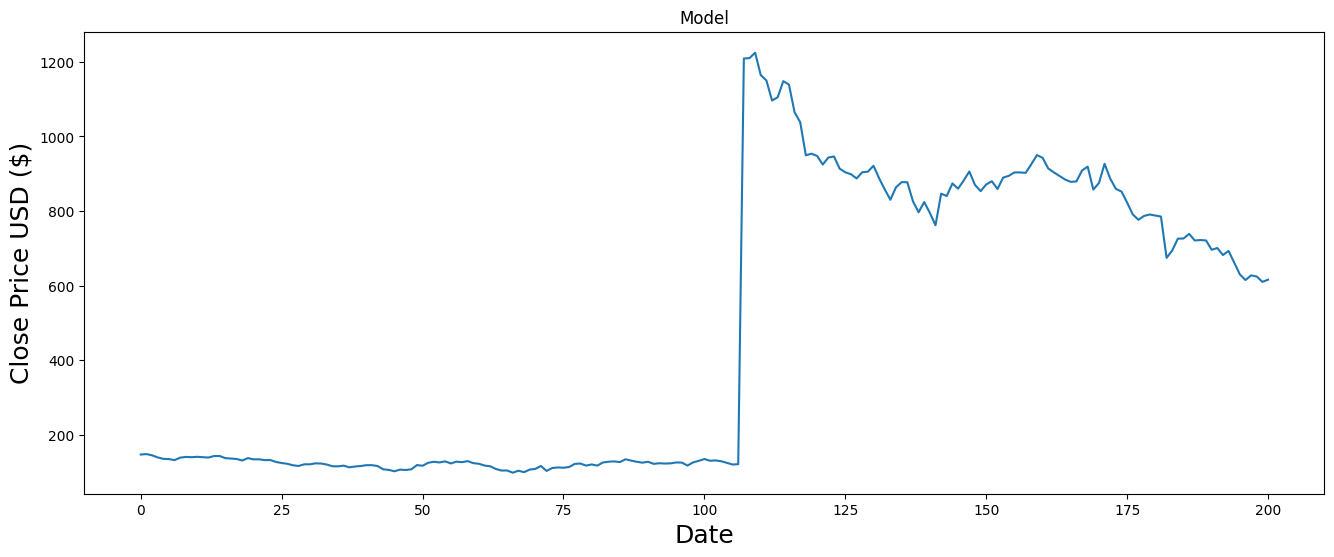

In [ ]:
import matplotlib.pyplot as plt
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['close'])
plt.plot(valid[['close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [19]:
# Show the valid and predicted prices
valid

,close,Predictions
201,613.62,576.504761
202,598.73,570.715454
203,596.54,565.080872
204,594.91,559.925110
205,571.07,555.415344
206,560.53,549.579163
207,563.82,542.616211
208,547.10,535.979553
209,548.22,528.676575
210,543.50,521.832581
